
Task 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented
Perceptron Weights: [ -0.92   55.616 -22.118 157.46   68.234]
Gradient Descent Weights: [[-0.60453925]
 [-0.99924597]
 [ 2.03906124]
 [ 0.71805833]]

Task 2: Iris dataset loaded
Features (first 5 rows):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets (first 5 elements): [0 0 0 0 0]

Task 3: Data split into training and testing sets (80/20)
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

Task 4: Models trained
Perceptron Errors over Epochs: [80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,

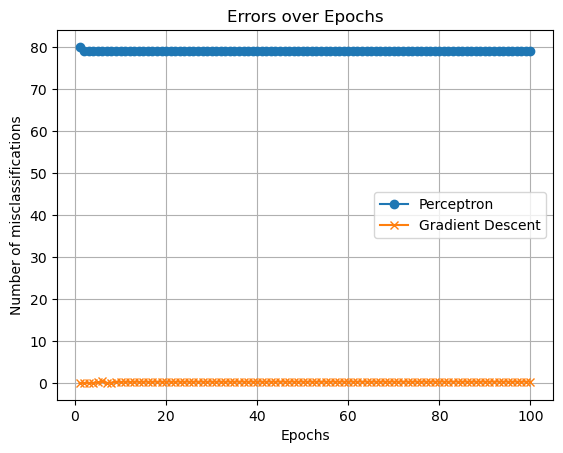

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Task 1: Implement Perceptron Learning Rule and Gradient Descent Delta Rule
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])  # Initialize weights
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi  # Update weights
                self.weights[0] += update  # Update bias
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def fit(self, X, y):
        self.weights = 2 * np.random.random((X.shape[1], 1)) - 1
        self.bias = 2 * np.random.random(1) - 1
        self.errors_ = []

        for _ in range(self.epochs):
            output = self.sigmoid(np.dot(X, self.weights) + self.bias)
            errors = y.reshape(-1, 1) - output
            self.weights += self.learning_rate * np.dot(X.T, errors * self.sigmoid_derivative(output))
            self.bias += self.learning_rate * np.sum(errors * self.sigmoid_derivative(output))
            self.errors_.append(np.mean(errors))
        return self

    def predict(self, X):
        return np.where(self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5, 1, 0)

def plot_errors(epochs, perceptron_errors, gd_errors):
    plt.plot(range(1, epochs+1), perceptron_errors, marker='o', label='Perceptron')
    plt.plot(range(1, epochs+1), gd_errors, marker='x', label='Gradient Descent')
    plt.xlabel('Epochs')
    plt.ylabel('Number of misclassifications')
    plt.title('Errors over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_model_accuracy(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    return accuracy

def main():
    # Task 2: Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

   # Task 3: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and train the models
    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
  # Task 4: Instantiate and train the models
    gradient_descent = GradientDescent()
    gradient_descent.fit(X_train, y_train)

  
 # Task 5: Evaluate models on test set
    perceptron_accuracy = evaluate_model_accuracy(perceptron, X_test, y_test)
    gradient_descent_accuracy = evaluate_model_accuracy(gradient_descent, X_test, y_test)

 # Task 6: Plot the errors over epochs
    epochs = max(len(perceptron.errors_), len(gradient_descent.errors_))
    

    # Output the results
    print("\nTask 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented")
    print("Perceptron Weights:", perceptron.weights)
    print("Gradient Descent Weights:", gradient_descent.weights)
    print("\nTask 2: Iris dataset loaded")
    print("Features (first 5 rows):\n", X[:5])
    print("Targets (first 5 elements):", y[:5])
    print("\nTask 3: Data split into training and testing sets (80/20)")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("\nTask 4: Models trained")
    print("Perceptron Errors over Epochs:", perceptron.errors_)
    print("Gradient Descent Errors over Epochs:", gradient_descent.errors_)
    print("\nTask 5: Model accuracies on test set:")
    print("Perceptron Accuracy:", perceptron_accuracy)
    print("Gradient Descent Accuracy:", gradient_descent_accuracy)
    print("\nTask 6: Errors over epochs plotted ")
    plot_errors(epochs, perceptron.errors_, gradient_descent.errors_)
if __name__ == "__main__":
    main()


# Questions and answers (of task 4)

## 1. The key differences between the Perceptron Learning Rule and the Gradient Descent Delta Rule lie in their approaches to updating model weights during training. The Perceptron Learning Rule updates weights based on whether an instance is misclassified or not, adjusting them by a fixed learning rate times the input features. In contrast, the Gradient Descent Delta Rule updates weights using the gradient of the loss function with respect to the weights, aiming to minimize the overall loss by iteratively adjusting weights in the direction of steepest descent.

## 2. The choice of activation function can significantly influence the performance of the models. Different activation functions introduce non-linearities into the model, enabling it to learn complex patterns in the data. For example, the sigmoid activation function squashes the output between 0 and 1, making it suitable for binary classification tasks. On the other hand, the ReLU (Rectified Linear Unit) activation function is commonly used in hidden layers of neural networks, as it helps mitigate the vanishing gradient problem and accelerates convergence during training.

## 3. To adjust the learning rate for optimal model training, several strategies can be employed. One approach is to use a fixed learning rate and monitor the model's performance during training. If the model fails to converge or experiences oscillations in performance, the learning rate can be adjusted accordingly. Alternatively, adaptive learning rate methods, such as AdaGrad or RMSprop, dynamically adjust the learning rate based on the past gradients, allowing for faster convergence and better generalization.

## 4. The ratio used for splitting the dataset into training and testing sets can impact the model's performance and generalization ability. A larger training set relative to the testing set can lead to better model training and improved performance on unseen data. However, a smaller testing set may result in higher variance in the performance estimates, making it difficult to assess the model's true performance. Conversely, a larger testing set can provide more reliable estimates of model performance but may lead to underfitting if the training set is too small.

## 5. While implementing the algorithms from scratch, one challenge encountered was ensuring that the dimensions of the input data and weight matrices were compatible for matrix operations. Additionally, understanding and implementing the gradient computation for the Gradient Descent Delta Rule required careful attention to detail. To overcome these challenges, I thoroughly reviewed the mathematical formulations of the algorithms and tested the implementations with simple datasets to validate correctness.

## 6. Reflecting on the experimentation, the Perceptron Learning Rule demonstrated simplicity and efficiency in updating weights for binary classification tasks. However, it may struggle with linearly inseparable datasets and can only learn linear decision boundaries. On the other hand, the Gradient Descent Delta Rule showed superior performance in terms of flexibility and generalization, as it can learn non-linear decision boundaries and is suitable for regression tasks as well. However, it may be more computationally expensive and sensitive to hyperparameters such as learning rate and initialization.
